In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_results(name):        
    Trange = np.load('data/'+str(name)+'_Trange.npy')
    A = np.load('data/'+str(name)+'_A.npy')
    sigmaA = np.load('data/'+str(name)+'_sigmaA.npy')
    acorr = np.load('data/'+str(name)+'_acorr.npy')
    f = np.load('data/'+str(name)+'_f.npy')
    spectra = np.load('data/'+str(name)+'_spectra.npy')
    
    return (Trange, A, sigmaA, acorr, f, spectra)

def my_argmax(xx, dec=True):
    if dec==True:
        return np.where(xx==np.max(xx))[0][-1]
    else:
        return np.where(xx==np.max(xx))[0][0]

# Finite size analysis

## r1=0.1, r2=0.1

In [3]:
r1 = 0.1
r2 = 0.1

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

deltaT_th = Tplus - Tminus

In [128]:
Ns = [5e2, 1e3, 5e3, 1e4, 2e4, 3e4, 4e4, 5e4]
results = []

for N in Ns:
    name = 'N_'+str(int(N))+'_p_1_r1_'+str(r1)+'_r2_'+str(r2)
    res = load_results(name)
    results.append(res)

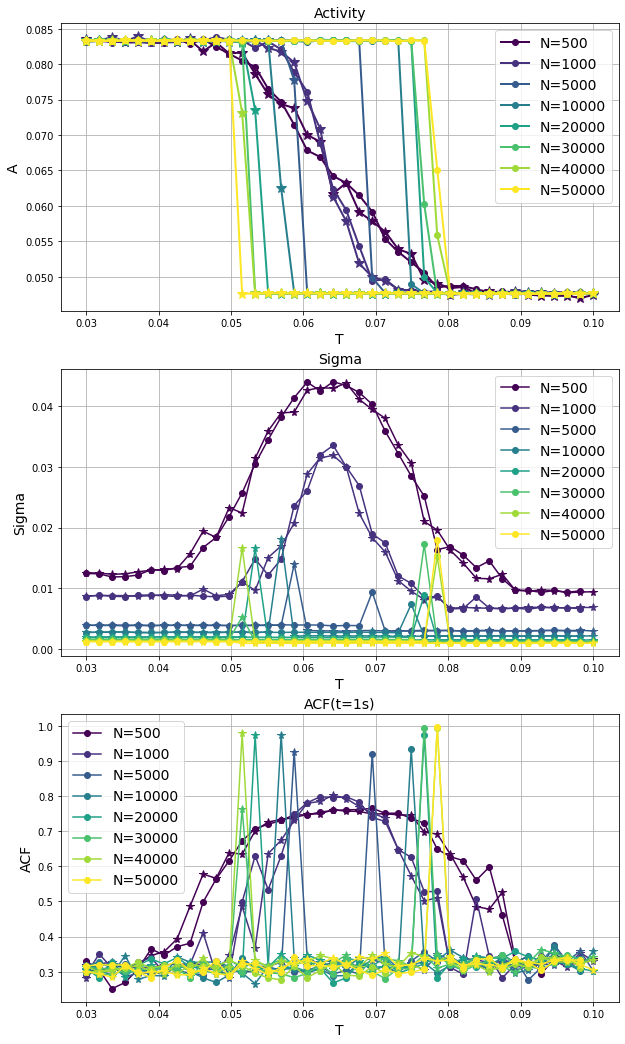

In [30]:
cmap = plt.cm.get_cmap('viridis', len(results))

plt.figure(figsize=(10,18))

plt.subplot(3,1,1)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[1][:len(res[0])//2], 'o-', label='N='+str(int(Ns[i])), c=cmap(i), lw=2)
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[1][len(res[0])//2:], '*-', c=cmap(i), ms=10, lw=2)

plt.xlabel('T', size=14)
plt.ylabel('A', size=14)
plt.title('Activity', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.subplot(3,1,2)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[2][:len(res[0])//2], 'o-', label='N='+str(int(Ns[i])), c=cmap(i))
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[2][len(res[0])//2:], '*-', c=cmap(i), ms=8)

plt.xlabel('T', size=14)
plt.ylabel('Sigma', size=14)
plt.title('Sigma', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.subplot(3,1,3)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[3][:len(res[0])//2][:,20], 'o-', label='N='+str(int(Ns[i])), c=cmap(i))
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[3][len(res[0])//2:][:,20], '*-', c=cmap(i), ms=8)

plt.xlabel('T', size=14)
plt.ylabel('ACF', size=14)
plt.title('ACF(t=1s)', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.show()

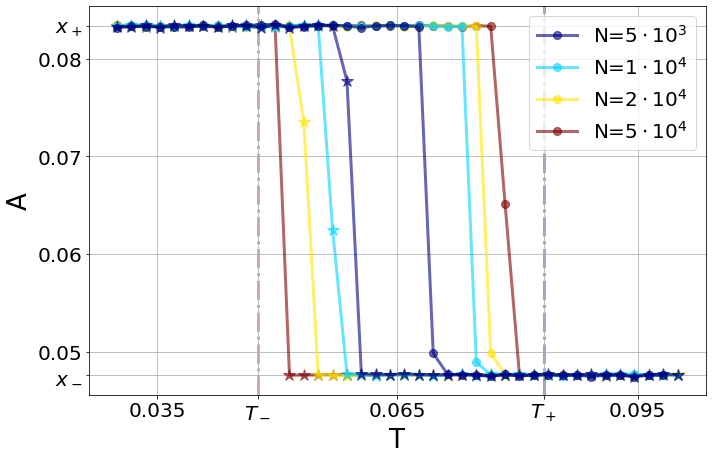

In [131]:
size = 26
alpha = 0.6

alpha_2 = 0.4

cmap = plt.cm.get_cmap('jet', len(results))

plt.figure(figsize=(10,6.5))

#plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1, alpha=alpha)
#plt.axhline(xminus, ls='--', c='red', lw=3, zorder=1, alpha=alpha)

plt.axvline(Tminus, ls='-.', c='red', lw=3, zorder=1, alpha=alpha_2)
plt.axvline(Tplus, ls='-.', c='blue', lw=3, zorder=1, alpha=alpha_2)

to_print = [2, 3, 4, 7]

N_to_print = [Ns[i] for i in to_print]
results_to_print = [results[i] for i in to_print]
cmap = plt.cm.get_cmap('jet', len(results_to_print))

for i, res in enumerate(results_to_print):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[1][:len(res[0])//2], 'o-', label='N='+sci_notation(N_to_print[i], decimal_digits=0), c=cmap(i), ms=8, lw=3, alpha=alpha, zorder=100-i)
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[1][len(res[0])//2:], '*-', c=cmap(i), ms=12, lw=3, alpha=alpha, zorder=100-i)
    
plt.xlabel('T', size=size)
plt.ylabel('A', size=size)

xpos = np.arange(0.05, 0.09, 0.01)
xtick = np.round(xpos,2).astype(str)
xpos = list(xpos) + [xminus, xplus]
xtick = list(xtick) + [r'$x_-$', r'$x_+$']

ypos = np.arange(0.035, 0.11, 0.03)
ytick = np.round(ypos,3).astype(str)
ypos = list(ypos) + [Tminus, Tplus]
ytick = list(ytick) + [r'$T_-$', r'$T_+$']

plt.yticks(fontsize=size-6, ticks = xpos, labels=xtick)
plt.xticks(fontsize=size-6, ticks = ypos, labels=ytick)

#plt.yticks(fontsize=size-8)
#plt.xticks(fontsize=size-8)
    
plt.legend(fontsize=size-6)
plt.grid()

#plt.show()
plt.tight_layout()
plt.savefig('figures/act_various_sizes.pdf')

In [54]:
delta_sigma = np.zeros(len(results))
delta_acf = np.zeros(len(results))

for i, res in enumerate(results):
    T_inc = my_argmax(res[2][:len(res[0])//2])
    T_dec = my_argmax(res[2][len(res[0])//2:], dec=False)
    delta_sigma[i] = res[0][T_inc] - res[0][len(res[0])//2+T_dec]
    
    T_inc = my_argmax(res[3][:len(res[0])//2][:,20])
    T_dec = my_argmax(res[3][len(res[0])//2:][:,20], dec=False)
    delta_acf[i] = res[0][T_inc] - res[0][len(res[0])//2+T_dec]

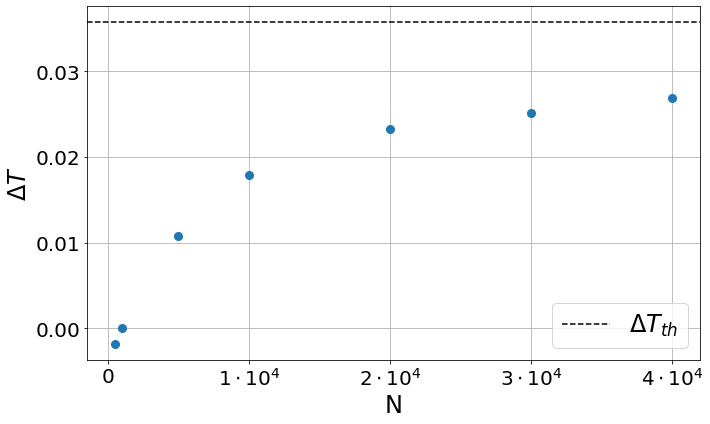

In [87]:
size = 24

plt.figure(figsize=(10,6))

plt.plot(Ns[:-1], delta_sigma[:-1], 'o', ms=8)
#plt.plot(Ns, delta_acf, '*', label=r'$acf(\tau=1s)$', ms=8)

#xx = np.linspace(ps[0]-0.05, ps[-1]+0.05, 100)
#plt.plot(xx, model1[0]*xx + model1[1], '--', c='k')
plt.axhline(deltaT_th, ls='--', c='k', label=r'$\Delta T_{th}$')

plt.xlabel('N', size=size)
plt.ylabel(r'$\Delta T$', size=size)
#plt.title(r'$\Delta T$ vs. size N', size=size)

plt.grid()
plt.legend(fontsize=size)

tt = np.arange(0,5e4, 1e4)
plt.xticks(size=size-4, ticks=tt, labels=[sci_notation(x, decimal_digits=0) for x in tt])
plt.yticks(size=size-4, ticks=np.arange(0, 0.04, 0.01))

#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

#plt.show()

plt.tight_layout()
plt.savefig('figures/deltaT_scaling.pdf')

## r1=0.001, r2=0.2

In [23]:
r1 = 0.001
r2 = 0.2

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

deltaT_th = Tplus - Tminus

In [24]:
Ns = [5e2, 1e3, 5e3, 1e4, 5e4]
results = []

for N in Ns:
    name = 'N_'+str(int(N))+'_p_1_r1_'+str(r1)+'_r2_'+str(r2)
    res = load_results(name)
    results.append(res)

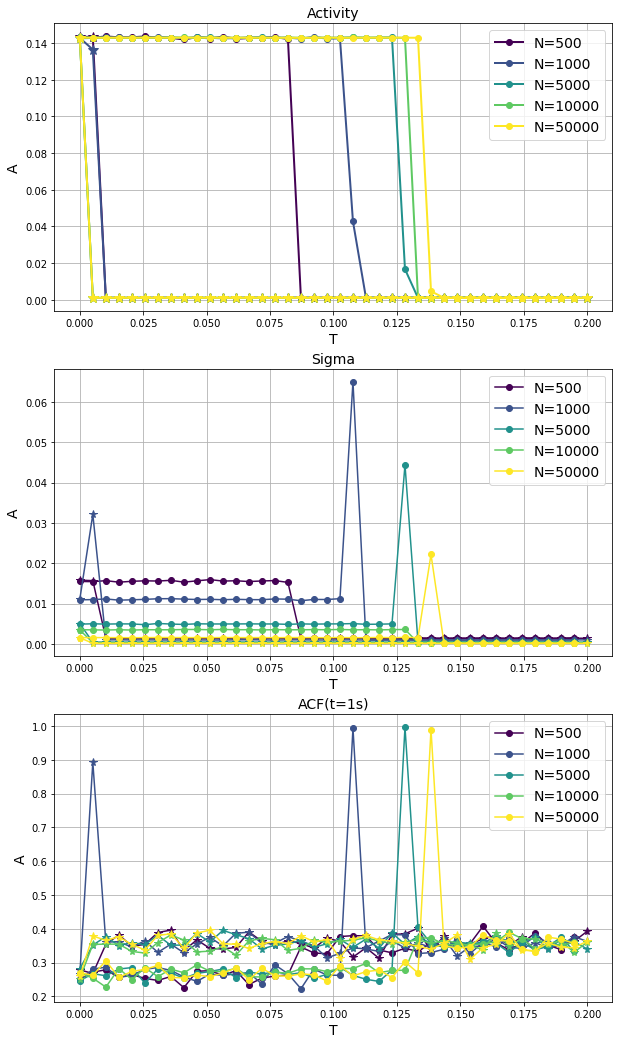

In [25]:
cmap = plt.cm.get_cmap('viridis', len(results))

plt.figure(figsize=(10,18))

plt.subplot(3,1,1)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[1][:len(res[0])//2], 'o-', label='N='+str(int(Ns[i])), c=cmap(i), lw=2)
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[1][len(res[0])//2:], '*-', c=cmap(i), ms=10, lw=2)

plt.xlabel('T', size=14)
plt.ylabel('A', size=14)
plt.title('Activity', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.subplot(3,1,2)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[2][:len(res[0])//2], 'o-', label='N='+str(int(Ns[i])), c=cmap(i))
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[2][len(res[0])//2:], '*-', c=cmap(i), ms=8)

plt.xlabel('T', size=14)
plt.ylabel('A', size=14)
plt.title('Sigma', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.subplot(3,1,3)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[3][:len(res[0])//2][:,20], 'o-', label='N='+str(int(Ns[i])), c=cmap(i))
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[3][len(res[0])//2:][:,20], '*-', c=cmap(i), ms=8)

plt.xlabel('T', size=14)
plt.ylabel('A', size=14)
plt.title('ACF(t=1s)', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.show()

# Effect of connectivity

In [88]:
r1 = 0.1
r2 = 0.1

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

deltaT_th = Tplus - Tminus

In [89]:
print(Tplus, Tminus, deltaT_th)

0.08333333333333334 0.04761904761904762 0.03571428571428572


In [132]:
ps = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
N = int(1e4)

results = []

for p in ps:
    name = 'N_'+str(N)+'_p_{:.1f}'.format(p)
    res = load_results(name)
    results.append(res)

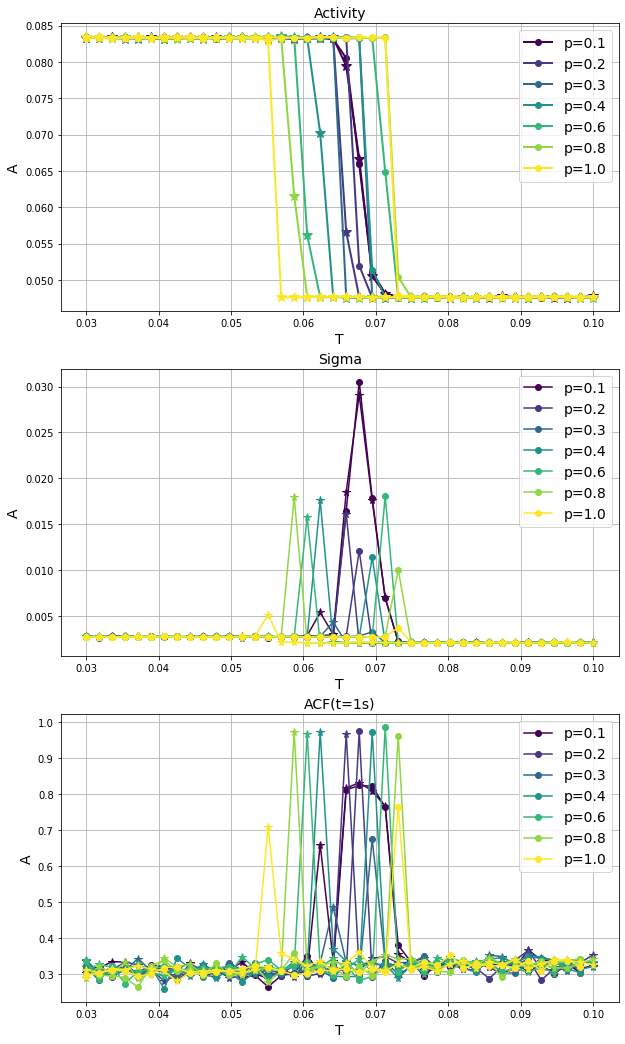

In [94]:
cmap = plt.cm.get_cmap('viridis', len(results))

plt.figure(figsize=(10,18))

plt.subplot(3,1,1)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[1][:len(res[0])//2], 'o-', label='p={:.1f}'.format(ps[i]), c=cmap(i), lw=2)
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[1][len(res[0])//2:], '*-', c=cmap(i), ms=10, lw=2)

plt.xlabel('T', size=14)
plt.ylabel('A', size=14)
plt.title('Activity', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.subplot(3,1,2)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[2][:len(res[0])//2], 'o-', label='p={:.1f}'.format(ps[i]), c=cmap(i))
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[2][len(res[0])//2:], '*-', c=cmap(i), ms=8)

plt.xlabel('T', size=14)
plt.ylabel('A', size=14)
plt.title('Sigma', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.subplot(3,1,3)

for i, res in enumerate(results):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[3][:len(res[0])//2][:,20], 'o-', label='p={:.1f}'.format(ps[i]), c=cmap(i))
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[3][len(res[0])//2:][:,20], '*-', c=cmap(i), ms=8)

plt.xlabel('T', size=14)
plt.ylabel('A', size=14)
plt.title('ACF(t=1s)', size=14)
    
plt.legend(fontsize=14)
plt.grid()

plt.show()

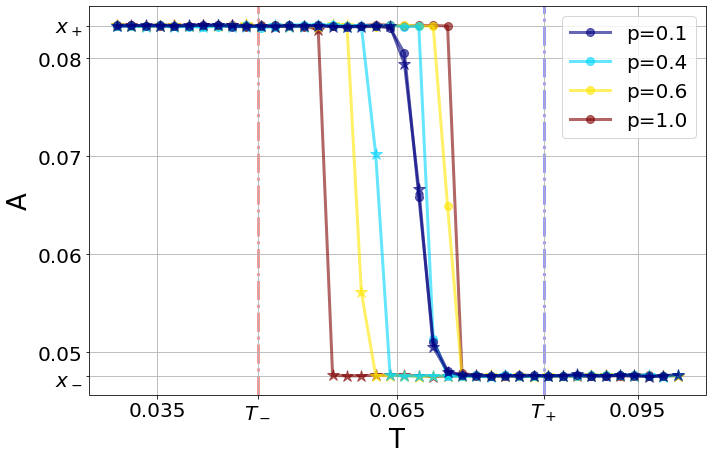

In [135]:
size = 26
alpha = 0.6

alpha_2 = 0.4

plt.figure(figsize=(10,6.5))

#plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1, alpha=alpha)
#plt.axhline(xminus, ls='--', c='red', lw=3, zorder=1, alpha=alpha)

plt.axvline(Tminus, ls='-.', c='red', lw=3, zorder=1, alpha=alpha_2)
plt.axvline(Tplus, ls='-.', c='blue', lw=3, zorder=1, alpha=alpha_2)

to_print = [0, 3, 4, 6]
p_to_print = [ps[i] for i in to_print]
results_to_print = [results[i] for i in to_print]
cmap = plt.cm.get_cmap('jet', len(results_to_print))

for i, res in enumerate(results_to_print):
    # increasing T with dots
    plt.plot(res[0][:len(res[0])//2], res[1][:len(res[0])//2], 'o-', label='p='+str(p_to_print[i]), c=cmap(i), ms=8, lw=3, alpha=alpha, zorder=100-i)
    # decreasing T with stars
    plt.plot(res[0][len(res[0])//2:], res[1][len(res[0])//2:], '*-', c=cmap(i), ms=12, lw=3, alpha=alpha, zorder=100-i)
    
plt.xlabel('T', size=size)
plt.ylabel('A', size=size)

xpos = np.arange(0.05, 0.09, 0.01)
xtick = np.round(xpos,2).astype(str)
xpos = list(xpos) + [xminus, xplus]
xtick = list(xtick) + [r'$x_-$', r'$x_+$']

ypos = np.arange(0.035, 0.11, 0.03)
ytick = np.round(ypos,3).astype(str)
ypos = list(ypos) + [Tminus, Tplus]
ytick = list(ytick) + [r'$T_-$', r'$T_+$']

plt.yticks(fontsize=size-6, ticks = xpos, labels=xtick)
plt.xticks(fontsize=size-6, ticks = ypos, labels=ytick)

#plt.yticks(fontsize=size-8)
#plt.xticks(fontsize=size-8)
    
plt.legend(fontsize=size-6)
plt.grid()

#plt.show()
plt.tight_layout()
plt.savefig('figures/act_various_p.pdf')

In [84]:
delta_sigma = np.zeros(len(results))
delta_acf = np.zeros(len(results))

for i, res in enumerate(results):
    T_inc = np.argmax(res[2][:len(res[0])//2])
    T_dec = np.argmax(res[2][len(res[0])//2:])
    delta_sigma[i] = res[0][T_inc] - res[0][len(res[0])//2+T_dec]
    
    T_inc = np.argmax(res[3][:len(res[0])//2][:,20])
    T_dec = np.argmax(res[3][len(res[0])//2:][:,20])
    delta_acf[i] = res[0][T_inc] - res[0][len(res[0])//2+T_dec]

In [99]:
model1 = np.polyfit(ps, delta_sigma, 1)
model2 = np.polyfit(ps, delta_acf, 1)

print(model1)
print(model2)

[ 0.01980685 -0.00141534]
[ 0.01980685 -0.00141534]


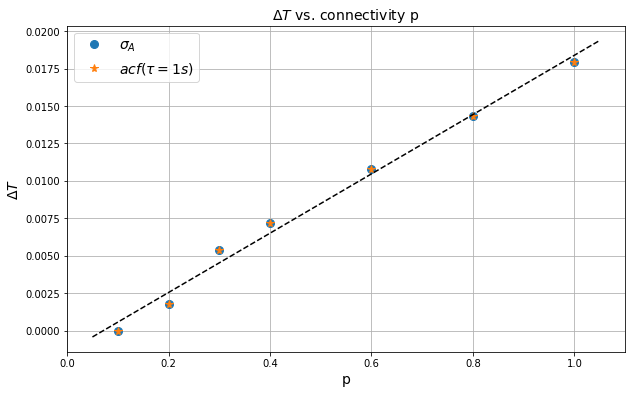

In [111]:
plt.figure(figsize=(10,6))

plt.plot(ps, delta_sigma, 'o', label=r'$\sigma_A$', ms=8)
plt.plot(ps, delta_acf, '*', label=r'$acf(\tau=1s)$', ms=8)

xx = np.linspace(ps[0]-0.05, ps[-1]+0.05, 100)
plt.plot(xx, model1[0]*xx + model1[1], '--', c='k')
#plt.axhline(deltaT_th)

plt.xlabel('p', size=14)
plt.ylabel(r'$\Delta T$', size=14)
plt.title(r'$\Delta T$ vs. connectivity p', size=14)

plt.grid()
plt.legend(fontsize=14)

plt.show()

In [1]:
r1 = 0.1
r2 = 0.1

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

print(Tminus, Tplus)

0.04761904761904762 0.08333333333333334


In [2]:
r1 = 0.001
r2 = 0.2

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

print(Tminus, Tplus)

0.0009940357852882703 0.14285714285714288


In [28]:
xx = np.zeros(10)

In [40]:
xx[xx == np.max(xx)][-1]

0.0

In [36]:
def my_argmax(xx):
    return (xx == np.max(xx))[-1]

In [43]:
np.where(xx==np.max(xx))[0][-1]

9

In [39]:
aa = 1e5

In [43]:
'{:.0E}'.format(aa)

'1E+05'

In [84]:
# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if num==0:
        return str(0)
    if exponent is None:
        exponent = int(np.floor(np.log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)

In [48]:
print(sci_notation(1e4, decimal_digits=0))

$1\cdot10^{4}$
